In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  #provides high level interface for drawing informative statistical graphics.
%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')     #Reading the file into the dataframe

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
#There are 11 missing values in the Total Charges column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
for index,row in df.TotalCharges.iteritems():
    if(row==""):
        df.TotalCharges.loc[index]=np.NaN
df.TotalCharges=df.TotalCharges.fillna(np.mean(df.TotalCharges))
#The missing values are filled with the mean value of Total Charges

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
df.isnull().sum()
#Total charges column is cleaned

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#EXPLORING DATA
#1) GENDER DISTRIBUTION
df2 = df.iloc[:,1:]   #Second column of the dataframe

#Converting the yes/no values to binary numeric variable(1/0)
df2['gender'].replace(to_replace='Yes', value=1, inplace=True)
df2['gender'].replace(to_replace='No',  value=0, inplace=True)

#convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


Text(0,0.5,'% OF CUSTOMERS')

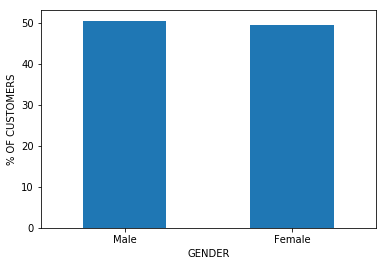

In [12]:
gender=(df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',rot=0,stacked = True)
gender.set_xlabel('GENDER')
gender.set_ylabel('% OF CUSTOMERS')
#From the below plot we understand that the percentage of customers for male and females is almost same.

[5901, 1142]


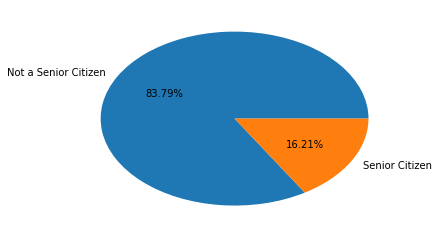

In [11]:
#Senior Citizens

SenCit=[0,0]
for r,i in df.SeniorCitizen.iteritems():
    if i == 0:
        SenCit[0]+=1
    else:
        SenCit[1]+=1
print(SenCit)
labels = ['Not a Senior Citizen','Senior Citizen']
plt.pie(SenCit,labels = labels,autopct='%1.2f%%')
plt.show()
#From the below pie chart, we can say that there are only a few % of customers that are senior citizens.

Text(0,0.5,'No of customers')

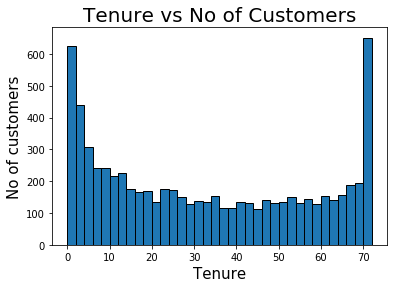

In [16]:
#INSIGHTS:
#1)Tenure
plt.hist(df.tenure,bins=36,edgecolor='black')
plt.title('Tenure vs No of Customers',fontsize=20)
plt.xlabel('Tenure',fontsize=15)
plt.ylabel('No of customers',fontsize=15)
#From the below graph we can conclude that a lot of customers have been with the telecom company for just a month, 
#while quite a many are there for about 72 months. 

Text(0.5,0,'Churn')

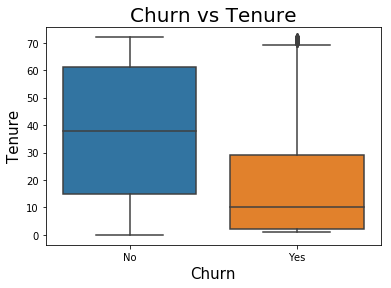

In [26]:
# 2)Churn vs Tenure
ax = sns.boxplot(x='Churn', y = 'tenure', data=df)
ax.set_title('Churn vs Tenure', fontsize=20)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
#From the below boxplot it is clearly evident that shorter is the tenure, higher is the possibility of churn

Text(0.5,0,'Tenure in Months')

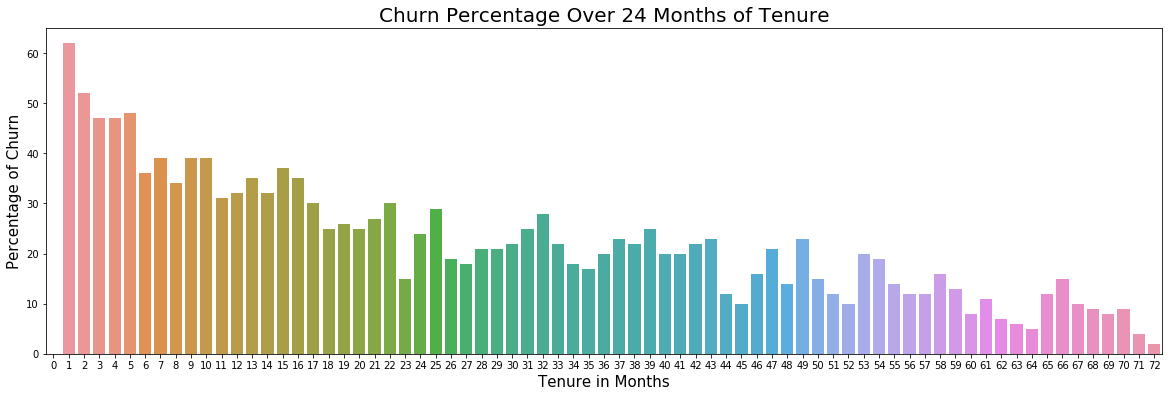

In [35]:
# 3) Churn Percentage over 24 Months of Tenure
agg =df.replace('Yes', 1).replace('No', 0).groupby('tenure', as_index=False)[['Churn']].mean()
agg = agg[agg.tenure < 73]
agg['Churn'] = np.round(agg['Churn'], 2) * 100
plt.figure(figsize=(20,6))

ax = sns.barplot(x='tenure', y='Churn',data = agg)
ax.set_title('Churn Percentage Over 24 Months of Tenure', fontsize=20)
ax.set_ylabel('Percentage of Churn', fontsize = 15)
ax.set_xlabel('Tenure in Months', fontsize = 15)
#Over 60% of customers who complete one month of tenure Churn. 
#As the length of tenure increases Churn reduces to about 3 percent at 72 months. 

Text(0.5,0,'Churn')

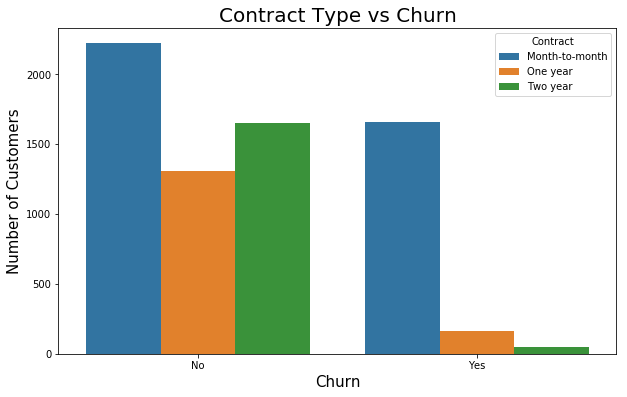

In [52]:
#4) Contract Type vs Churn
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Churn", hue="Contract", data=df);#countplot is a histogram across a categorical data
ax.set_title('Contract Type vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
#From below graph we can see that people with Month-Month contract churn the most while those with Two-year contract 
#churn the least.

Text(0.5,1,'Churn Among Senior Citizens vs Non Senior (Percentage)')

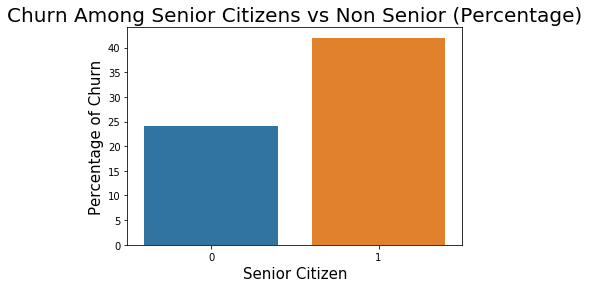

In [47]:
#5) Churn among Senior Citizens vs Non Senior Citizens
agg = df.replace('Yes',1).replace('No',0).groupby('SeniorCitizen', as_index=False)[['Churn']].sum()
agg.iloc[0,1] = round(agg.iloc[0,1]/df[df.SeniorCitizen==0].shape[0], 2) * 100
agg.iloc[1,1] = round(agg.iloc[1,1]/df[df.SeniorCitizen==1].shape[0], 2) * 100

ax = sns.barplot(x='SeniorCitizen', y ='Churn', data = agg)
ax.set_ylabel('Percentage of Churn', fontsize=15)
ax.set_xlabel('Senior Citizen', fontsize=15)

ax.set_title('Churn Among Senior Citizens vs Non Senior (Percentage)', fontsize=20)
#Senior Citizens are churning in greater proportion, almost 42% of Sr.Citizens churn compared to about 
#25% of non Senior Citizens

Text(0.5,1,'Churn By Gender')

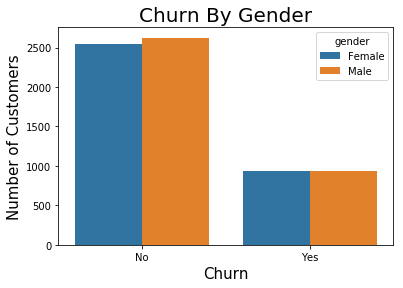

In [48]:
#6)Churn By Gender

ax = sns.countplot(x="Churn",hue="gender", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Gender', fontsize=20)
#Gender does not seem to influence Churn significantly

Text(0.5,1,'Churn By Internet Service Type')

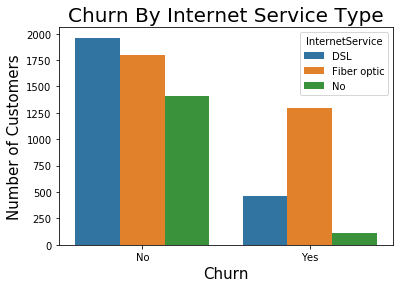

In [49]:
# 7) Churn By Internet Service Type
#plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="InternetService", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn By Internet Service Type', fontsize=20)
#From below graph ,customers with Fiber Optic internet service are churning in high proportions


Text(0.5,1,'Churn by Payment Method')

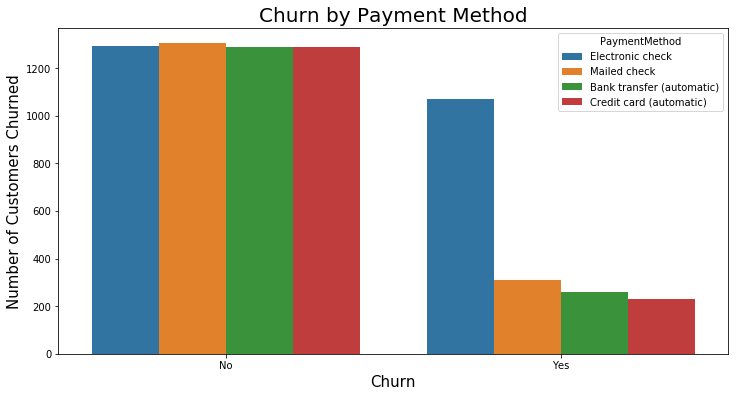

In [51]:
# 8) Churn by Payment Method
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="PaymentMethod", data=df);
ax.set_ylabel('Number of Customers Churned', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn by Payment Method', fontsize=20)
#From the graph ,Customers with Electronic Check as mode of payment are churning in higher proportion 

Text(0.5,1,'Churn by Contract Type')

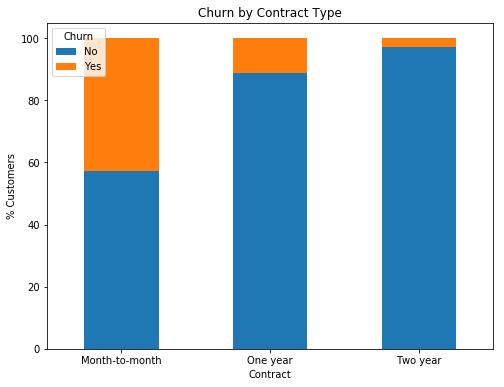

In [56]:
# 9) Churn By Contract Type

contract_churn = df.groupby(['Contract','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',stacked = True,rot = 0, figsize = (8,6))
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')    
#The customers who have availed Month-to-Month Contract churn the most, while those of Two-Year seem to be loyal to the
#company.

Text(0.5,1,'Distribution of monthly charges by churn')

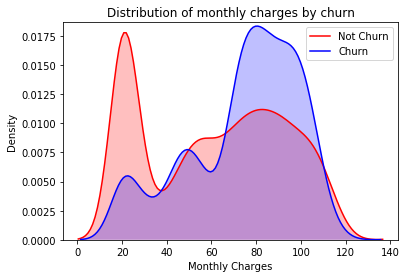

In [23]:
# 10)Distribution of monthly charges by churn using KDE plots 
#In statistics, kernel density estimation(KDE) is a non-parametric way to estimate the 
#probability density function of a random variable.
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# Higher % of customers churn when the monthly charges are high.

D:\Users\Shivaprasad\Anaconda31\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Users\Shivaprasad\Anaconda31\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'No of Customers')

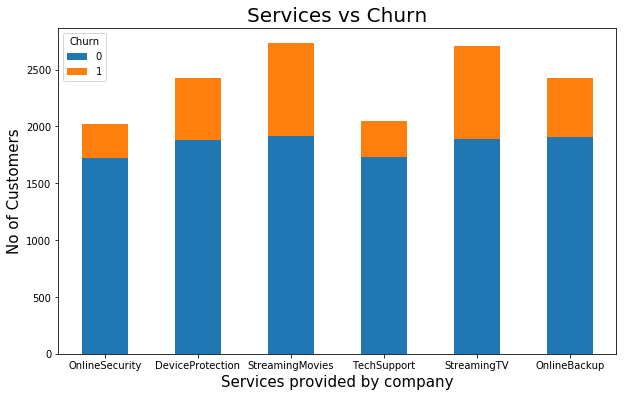

In [24]:
#Services vs CHURN
telecom_churn_services = df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies'
                                       ,'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]
telecom_churn_services.replace(to_replace='Yes', value=1, inplace=True)
telecom_churn_services.replace(to_replace='No', value=0, inplace=True)
telecom_churn_services = telecom_churn_services[telecom_churn_services.OnlineSecurity !='No internet service']             
agg = telecom_churn_services.groupby('Churn', as_index=False)[['OnlineSecurity', 'DeviceProtection', 
                                                               'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()
ax = agg.set_index('Churn').T.plot(kind='bar', stacked=True,rot=0, figsize=(10,6))
ax.set_title('Services vs Churn', fontsize=20)
ax.set_xlabel('Services provided by company', fontsize = 15)
ax.set_ylabel('No of Customers', fontsize = 15)
#From the below visualisation we can conclude that the customers who have availed Streaming TV and Streaming Movies 
#services from the company are churning at a greater proportion when compared to others.

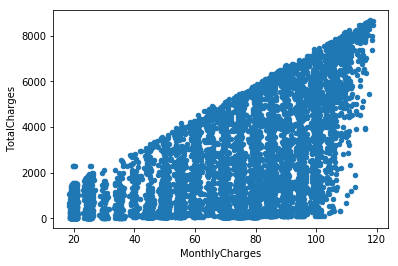

In [25]:
# Monthly Charges vs Total Charges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',y = 'TotalCharges')
#From the scatter plot we will observe that the total charges increases as the monthly bill for a customer increases.

Text(0.5,0,'Churn')

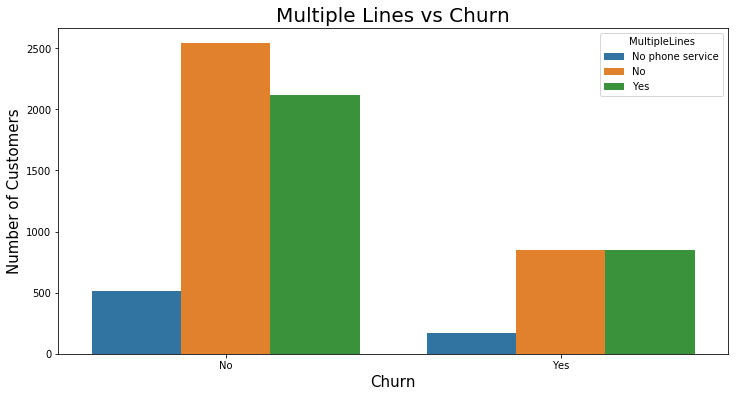

In [26]:
#Multiple lines vs Churn
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="MultipleLines", data=df);
ax.set_title('Multiple Lines vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
# From this we can observe that the customers who do not have phone service churn the least, while those with or without
#multiple lines churn almost at equal rate which implies that the multiple lines factor does NOT influence churn rate.

Text(0.5,1,'Tech Support vs Churn')

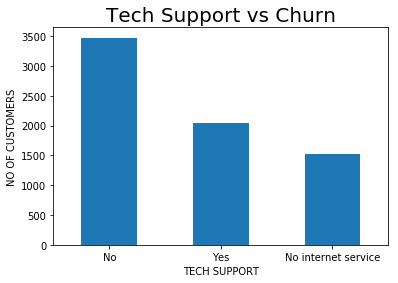

In [27]:
tech=(df['TechSupport'].value_counts()).plot(kind='bar',rot=0,stacked = True)
tech.set_xlabel('TECH SUPPORT')
tech.set_ylabel('NO OF CUSTOMERS')
tech.set_title('Tech Support vs Churn', fontsize=20)
#From the graph, we can observe that the people with tech support churn the least while those without tech support 
#churn the most.

In [41]:
from scipy.stats import norm
from math import sqrt

import random


rows = np.random.choice(df.MonthlyCharges, 100)
samp = df.MonthlyCharges.iloc[rows]
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = np.mean(samp)
pop_mean = np.mean(df.MonthlyCharges) 
sample_size =  100
std_dev = np.std(samp)

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ = 64.76169246059922
H1 : μ != 64.76169246059922
alpha value is : 0.05 

actual z value : 1.95996398454
hypothesis z value : 2.7318708589424254 

Reject NULL hypothesis


In [42]:
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    


print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 64.76169246059922
H1 : μ > 64.76169246059922
alpha value is : 0.05 

actual z value : 1.64485362695
hypothesis z value : 2.7318708589424254 

Reject NULL hypothesis
